### Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#suppress warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import plotly.express as px

### Read and understand Customer datafile 

In [50]:
Customer=pd.read_csv('Customers.csv')
Customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [51]:
Customer.shape

(200, 4)

In [52]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [53]:
Customer.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [54]:
Customer["CustomerID"].nunique()

200

In [55]:
Customer['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

### Read and understand Product datafile 

In [56]:
Products=pd.read_csv('Products.csv')
Products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [57]:
Products.shape

(100, 4)

In [58]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [59]:
Products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [60]:
Products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [61]:
Products.duplicated().sum()

0

### Read and understand Transaction datafile 

In [62]:
Transactions=pd.read_csv('Transactions.csv')
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [63]:
Transactions.shape

(1000, 7)

In [64]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [65]:
Transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [66]:
Transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [67]:
Transactions.duplicated().sum()

0

In [68]:
Transactions['Quantity'].unique()

array([1, 2, 3, 4], dtype=int64)

In [69]:
Transactions["TransactionID"].nunique()

1000

#### Check if TotalValue matches Quantity * Price

In [70]:
Transactions["CalculatedValue"] = (Transactions["Quantity"] * Transactions["Price"]).round(2)
value_mismatch = Transactions[Transactions["TotalValue"] != Transactions["CalculatedValue"]]
print(f"Number of mismatched rows: {len(value_mismatch)}")
display(value_mismatch)

Number of mismatched rows: 0


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CalculatedValue


In [71]:
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CalculatedValue  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 62.6+ KB


### Merge the tables

In [72]:
temp = Customer.merge(Transactions, on='CustomerID')
data = Products.merge(temp, on='ProductID')
data.head()

,ProductID,ProductName,Category,Price_x,CustomerID,CustomerName,Region,SignupDate,TransactionID,TransactionDate,Quantity,TotalValue,Price_y,CalculatedValue
0,P001,ActiveWear Biography,Books,169.3,C0017,Jennifer King,Europe,2023-12-05,T00758,2024-05-28 14:47:15,3,507.9,169.3,507.9
1,P001,ActiveWear Biography,Books,169.3,C0019,Brandon Rodriguez,Europe,2023-01-12,T00088,2024-01-30 17:23:03,2,338.6,169.3,338.6
2,P001,ActiveWear Biography,Books,169.3,C0024,Michele Cooley,North America,2024-02-05,T00314,2024-09-24 17:15:16,4,677.2,169.3,677.2
3,P001,ActiveWear Biography,Books,169.3,C0036,Brian Aguilar DDS,North America,2024-07-06,T00433,2024-05-05 05:01:18,2,338.6,169.3,338.6
4,P001,ActiveWear Biography,Books,169.3,C0045,Michael Williams,Asia,2022-02-25,T00732,2024-08-13 10:42:48,2,338.6,169.3,338.6


In [73]:
data['Price_x'].equals(data['Price_y'])

True

In [74]:
data = data.drop('Price_x', axis=1)
data.rename(columns={'Price_y':'Price'}, inplace=True)

In [75]:
data.head()

,ProductID,ProductName,Category,CustomerID,CustomerName,Region,SignupDate,TransactionID,TransactionDate,Quantity,TotalValue,Price,CalculatedValue
0,P001,ActiveWear Biography,Books,C0017,Jennifer King,Europe,2023-12-05,T00758,2024-05-28 14:47:15,3,507.9,169.3,507.9
1,P001,ActiveWear Biography,Books,C0019,Brandon Rodriguez,Europe,2023-01-12,T00088,2024-01-30 17:23:03,2,338.6,169.3,338.6
2,P001,ActiveWear Biography,Books,C0024,Michele Cooley,North America,2024-02-05,T00314,2024-09-24 17:15:16,4,677.2,169.3,677.2
3,P001,ActiveWear Biography,Books,C0036,Brian Aguilar DDS,North America,2024-07-06,T00433,2024-05-05 05:01:18,2,338.6,169.3,338.6
4,P001,ActiveWear Biography,Books,C0045,Michael Williams,Asia,2022-02-25,T00732,2024-08-13 10:42:48,2,338.6,169.3,338.6


#### Boxplot for visualizing outliers

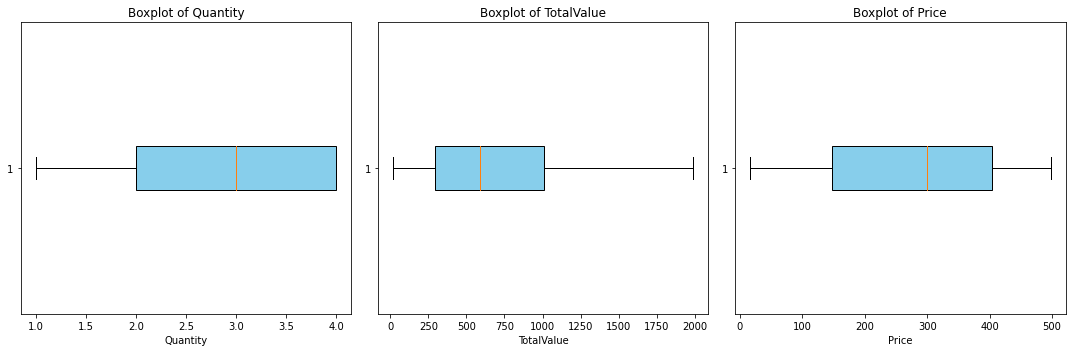

In [76]:
columns_to_check = ['Quantity', 'TotalValue', 'Price']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_check):
    plt.subplot(1, len(columns_to_check), i+1)
    plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [77]:
data['Region'].value_counts()

South America    304
North America    244
Europe           234
Asia             218
Name: Region, dtype: int64

In [78]:
data['Category'].value_counts()

Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: Category, dtype: int64

In [79]:
data['ProductName'].value_counts()

ActiveWear Smartwatch     40
SoundWave Headphones      38
BookWorld Biography       30
ActiveWear Rug            29
SoundWave Cookbook        29
                          ..
BookWorld Wall Art         7
BookWorld Rug              7
BookWorld Cookware Set     7
SoundWave Laptop           7
SoundWave Jacket           5
Name: ProductName, Length: 66, dtype: int64

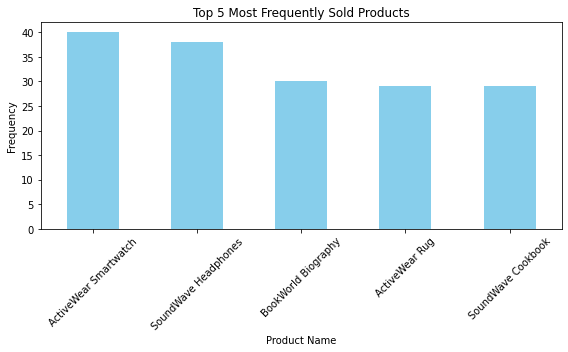

In [80]:
top_products = data['ProductName'].value_counts().head(5)

# Plot the bar chart
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Frequently Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales Trend Over the Months

Monthly sales distribution:
Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


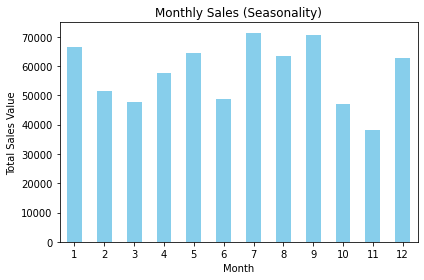

In [81]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month
data['Year'] = data['TransactionDate'].dt.year

# Group by month to identify seasonality
monthly_sales = data.groupby('Month')['TotalValue'].sum()
print("Monthly sales distribution:")
print(monthly_sales)

# Plot sales by month
plt.figure(figsize=(6, 4))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [82]:
data['Month_Year'] = pd.to_datetime(data['TransactionDate']).dt.strftime('%Y-%m')
monthly_sales = data.groupby('Month_Year')['TotalValue'].sum()
fig_sales_month = px.line(monthly_sales, x = monthly_sales.index, y = "TotalValue",
                          title = "Sales Trend Over the Months").update_traces(mode = 'lines+markers')
fig_sales_month.show()

#### Most frequently purchased products

In [83]:
most_products = data.groupby('ProductName').agg({'Category': 'first', 'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
most_products = most_products.sort_values('TotalValue', ascending = False).head(10)
most_products

,ProductName,Category,TotalValue,Quantity
9,ActiveWear Smartwatch,Electronics,39096.97,100
47,SoundWave Headphones,Electronics,25211.64,97
52,SoundWave Novel,Books,24507.90,58
4,ActiveWear Jacket,Clothing,22712.56,76
6,ActiveWear Rug,Home Decor,22314.43,79
58,TechPro Headphones,Electronics,19513.80,45
15,BookWorld Cookbook,Books,19221.99,48
21,BookWorld Sweater,Clothing,18743.79,47
64,TechPro Textbook,Books,18267.96,62
2,ActiveWear Cookware Set,Home Decor,18083.73,51


In [84]:
fig_most_products = px.bar(most_products, x = 'Quantity', y = 'ProductName', color = 'TotalValue', title = 'Most Frequently Purchased Products')
fig_most_products.update_layout(yaxis = {'categoryorder': 'total ascending'})
fig_most_products.show()

#### What is the most Revenue by Products Name?

In [85]:
most_products_revenue = most_products.sort_values('TotalValue', ascending = False).head(10)
most_products_revenue

,ProductName,Category,TotalValue,Quantity
9,ActiveWear Smartwatch,Electronics,39096.97,100
47,SoundWave Headphones,Electronics,25211.64,97
52,SoundWave Novel,Books,24507.90,58
4,ActiveWear Jacket,Clothing,22712.56,76
6,ActiveWear Rug,Home Decor,22314.43,79
58,TechPro Headphones,Electronics,19513.80,45
15,BookWorld Cookbook,Books,19221.99,48
21,BookWorld Sweater,Clothing,18743.79,47
64,TechPro Textbook,Books,18267.96,62
2,ActiveWear Cookware Set,Home Decor,18083.73,51


In [86]:
fig_most_products_revenue = px.bar(most_products, x = 'TotalValue', y = 'ProductName', color = 'Quantity', title = 'Most Revenue by Products Name')
fig_most_products_revenue.update_layout(yaxis = {'categoryorder': 'total ascending'})
fig_most_products_revenue.show()

### Highest Revenue Countries

In [87]:
dfCountry = data.groupby('Region')['TotalValue'].sum().reset_index()
dfCountry = dfCountry.sort_values('TotalValue', ascending = False).head(10)
dfCountry

,Region,TotalValue
3,South America,219352.56
1,Europe,166254.63
2,North America,152313.40
0,Asia,152074.97


Sales distribution across regions:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


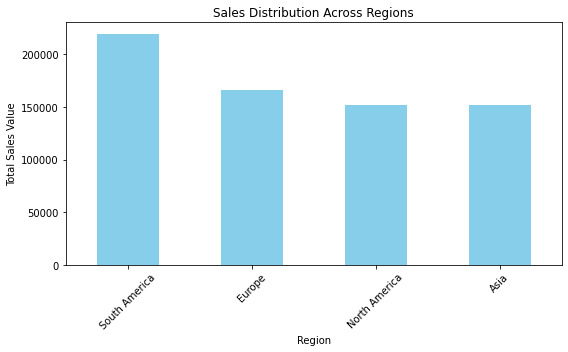

In [88]:
sales_by_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Print the aggregated sales
print("Sales distribution across regions:")
print(sales_by_region)

# Plot the sales distribution across regions
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales Trend Over the Day

In [89]:
data['Day'] = data['TransactionDate'].dt.strftime('%w')
data['Day_Name'] = data['TransactionDate'].dt.strftime('%A')

In [90]:
dfDay_Revenue = data.groupby('Day').agg({'Day_Name': 'first', 'TotalValue': 'sum', 'TransactionID': 'count'}).reset_index()
dfDay_Revenue = dfDay_Revenue.sort_values('Day', ascending = True)
dfDay_Revenue

,Day,Day_Name,TotalValue,TransactionID
0,0,Sunday,92605.93,139
1,1,Monday,101984.33,139
2,2,Tuesday,108567.61,163
3,3,Wednesday,119203.15,158
4,4,Thursday,99202.71,150
5,5,Friday,87032.09,125
6,6,Saturday,81399.74,126


In [91]:
fig_revenue_day = px.line(dfDay_Revenue, x = "Day_Name", y = "TotalValue", title = "Sales Trend Over the Day")
fig_revenue_day.update_traces(mode = 'lines+markers')
fig_revenue_day.show()

### Transaction Trend Over the Day

In [92]:
fig_transaction_day = px.line(dfDay_Revenue, x = "Day_Name", y = "TransactionID", title = "Transaction Trend Over the Day")
fig_transaction_day.update_traces(mode = 'lines+markers')
fig_transaction_day.show()

In [93]:
data.to_csv("final_data.csv", index=False) 